In [1]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import models, regularizers
from tensorflow.keras.optimizers import Adam

2024-11-29 11:12:29.938429: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-29 11:12:30.011048: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-29 11:12:30.071766: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-29 11:12:30.124814: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-29 11:12:30.140374: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-29 11:12:30.237393: I tensorflow/core/platform/cpu_feature_gu

## Preprocessing

In [2]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=(1.0, 2.0),
    fill_mode='nearest'
)

# Train and Validation Sets augmented
train_generator = train_datagen.flow_from_directory(
    '../data/interim/train',
    target_size=(150,150),
    batch_size=64,
    class_mode='binary'
)
validation_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    '../data/interim/validation',
    target_size=(150,150),
    batch_size=64,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [3]:
# Callbacks
checkpoint = ModelCheckpoint(
    '../models/catdog_class_v1,0.weights.h5',
    monitor='val_accuracy', 
    verbose= 1, 
    save_best_only=True,
    save_weights_only=True
)

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10)

## Model and Training

In [17]:
model = models.Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation= 'relu', kernel_regularizer=regularizers.l2(1e-5), input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3,3), padding='same', activation = 'relu', kernel_regularizer=regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), padding='same', activation = 'relu', kernel_regularizer=regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(256, (3,3), padding='same', activation = 'relu', kernel_regularizer=regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(512, (3,3), padding='same', activation = 'relu', kernel_regularizer=regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(512, (3,3), padding='same', activation = 'relu', kernel_regularizer=regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 18, 18, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 9, 9, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 9, 9, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 512)            │         2,04

 Total params: 4,986,049 (19.02 MB)

 Trainable params: 4,982,017 (19.00 MB)

 Non-trainable params: 4,032 (15.75 KB)

In [18]:
# Compile the model
model.compile(
    loss='binary_crossentropy', 
    optimizer = Adam(),
    metrics=['accuracy']
)

In [19]:
# Train the model
hist = model.fit(
    train_generator,
    steps_per_epoch=2000//64,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=1000//64,
    callbacks=[checkpoint],
    shuffle=True
)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5329 - loss: 1.2433
Epoch 1: val_accuracy did not improve from 0.97500
31/31 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.5332 - loss: 1.2384 - val_accuracy: 0.4990 - val_loss: 0.9523
Epoch 2/100
 1/31 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.6875 - loss: 0.6962
Epoch 2: val_accuracy did not improve from 0.97500
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6875 - loss: 0.6962 - val_accuracy: 0.5000 - val_loss: 1.0714
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5512 - loss: 0.8178
Epoch 3: val_accuracy did not improve from 0.97500
31/31 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.5518 - loss: 0.8169 - val_accuracy: 0.5042 - val_loss: 1.7610
Epoch 4/100
 1/31 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.4844 - loss: 0.8638
Epoch 4: val_accuracy did not improve from 0.97500
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4844 - loss: 0.8638 - val_accuracy: 0.4000 - val_loss: 2.134

2024-11-29 13:02:56.190191: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8295 - loss: 0.3979
Epoch 57: val_accuracy did not improve from 0.97500
31/31 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8290 - loss: 0.3986 - val_accuracy: 0.7573 - val_loss: 0.5420
Epoch 58/100
 1/31 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.7812 - loss: 0.4136
Epoch 58: val_accuracy did not improve from 0.97500
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7812 - loss: 0.4136 - val_accuracy: 0.9000 - val_loss: 0.3359
Epoch 59/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8499 - loss: 0.3751
Epoch 59: val_accuracy did not improve from 0.97500
31/31 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8496 - loss: 0.3756 - val_accuracy: 0.7885 - val_loss: 0.4834
Epoch 60/100
 1/31 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.8125 - loss: 0.4134
Epoch 60: val_accuracy did not improve from 0.97500
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8125 - loss: 0.4134 - val_accuracy: 0.6000 - val_loss: 0.7779
Epo

## Evaluation

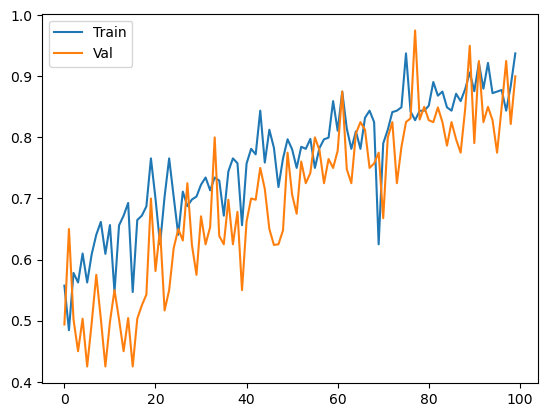

In [12]:
import matplotlib.pyplot as plt

# Plot the accuracy for both the training and validation set throughout the epochs
plt.plot(hist.history['accuracy'], label = 'Train')
plt.plot(hist.history['val_accuracy'], label = 'Val')
plt.legend()
plt.show()

In [13]:
# Evaluate the model for the test set
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    '../data/interim/test',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

model2 = model
model.load_weights('../models/catdog_class_v1,0.weights.h5')
model.evaluate(test_generator)

Found 1000 images belonging to 2 classes.
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.8437 - loss: 0.3847


[0.38524553179740906, 0.8500000238418579]